In [11]:
PLEX5_EXAMPLEFILE_SHORTENED= "../test_data/different_plexnums/MS013_LysN_2plex_report.tsv.shortened.tsv"

PLEX2_EXAMPLEFILE_SHORTENED = "../test_data/different_plexnums/MS013_LysN_5plex_report.tsv.shortened.tsv"

In [12]:
import re
import pandas as pd

df_plex5 = pd.read_csv(PLEX5_EXAMPLEFILE_SHORTENED, sep="\t")
display(df_plex5.columns)
channel_ids = [x.split(")")[0]+")" for x in df_plex5["Modified.Sequence"]]
df_plex5["channelID"] = channel_ids

ion_id = [f"SEQ_{x[0]}_MOD_{x[1]}_CHARGE_{x[2]}_" for x in  zip(df_plex5["Stripped.Sequence"], df_plex5["Modified.Sequence"], df_plex5["Precursor.Charge"])]
ion_id = [re.sub("\(Dimethyl-\w-\d\)","", x) for x in ion_id]
df_plex5["ion"] = ion_id
df_plex5["run_channel"] = df_plex5["Run"] + "_" + df_plex5["channelID"]
df_plex5 = df_plex5[["Protein.Group","ion", "run_channel", "Precursor.Normalised"]].rename(columns={"Precursor.Normalised": "intensity", "Protein.Group": "protein"})
df_plex5 = df_plex5[df_plex5["intensity"] > 0]
df_plex5["ID"] = df_plex5["protein"] +df_plex5["ion"] + df_plex5["run_channel"]
df_plex5 = df_plex5.sort_values(by = ["ID"])

Index(['Protein.Group', 'File.Name', 'Run', 'Protein.Ids', 'Protein.Names',
       'Genes', 'PG.Quantity', 'PG.Normalised', 'PG.MaxLFQ', 'Genes.Quantity',
       'Genes.Normalised', 'Genes.MaxLFQ', 'Genes.MaxLFQ.Unique',
       'Modified.Sequence', 'Stripped.Sequence', 'Precursor.Id',
       'Precursor.Charge', 'Q.Value', 'PEP', 'Global.Q.Value',
       'Protein.Q.Value', 'PG.Q.Value', 'Global.PG.Q.Value', 'GG.Q.Value',
       'Translated.Q.Value', 'Proteotypic', 'Precursor.Quantity',
       'Precursor.Normalised', 'Precursor.Translated', 'Translated.Quality',
       'Ms1.Translated', 'Quantity.Quality', 'RT', 'RT.Start', 'RT.Stop',
       'iRT', 'Predicted.RT', 'Predicted.iRT', 'First.Protein.Description',
       'Lib.Q.Value', 'Lib.PG.Q.Value', 'Ms1.Profile.Corr', 'Ms1.Area',
       'Evidence', 'Spectrum.Similarity', 'Averagine', 'Mass.Evidence',
       'CScore', 'Decoy.Evidence', 'Decoy.CScore', 'Fragment.Quant.Raw',
       'Fragment.Quant.Corrected', 'Fragment.Correlations', 'MS2.S

In [13]:
import refquant.table_preparation.table_utils as table_utils

df_plex5_reformatted = table_utils.import_data(PLEX5_EXAMPLEFILE_SHORTENED, input_type_to_use="diann_precursors_normalised_mDIA")


#stats for each column of df_plex5
df_plex5_reformatted_long = df_plex5_reformatted.melt(id_vars=["protein", "ion"], var_name="run_channel", value_name="intensity")
df_plex5_reformatted_long = df_plex5_reformatted_long[df_plex5_reformatted_long["intensity"] > 0].reset_index(drop=True)
df_plex5_reformatted_long["ID"] = df_plex5_reformatted_long["protein"] + df_plex5_reformatted_long["ion"] + df_plex5_reformatted_long["run_channel"]
df_plex5_reformatted_long = df_plex5_reformatted_long.sort_values(by=["ID"]).reset_index(drop=True)


using input type diann_precursors_normalised_mDIA


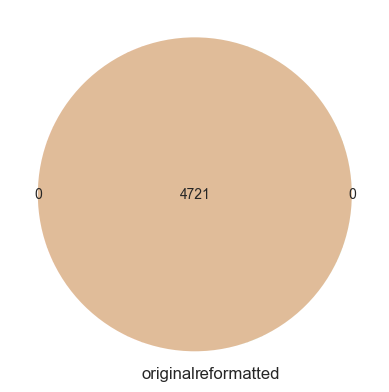

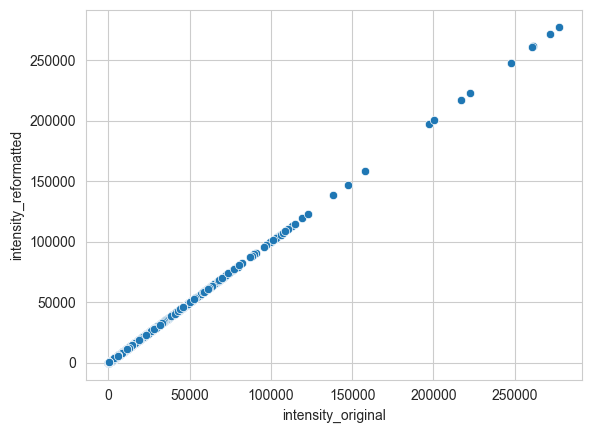

In [14]:
import matplotlib_venn as venn
import numpy as np

assert set(df_plex5["ID"]) == set(df_plex5_reformatted_long["ID"])
merged_table = pd.merge(df_plex5, df_plex5_reformatted_long, on="ID", how="outer", suffixes=["_original", "_reformatted"])
import scipy.stats as stats
corr = stats.pearsonr(merged_table["intensity_original"], merged_table["intensity_reformatted"])
assert np.isclose(corr[0], 1.0)

venn.venn2([set(df_plex5["ID"]), set(df_plex5_reformatted_long["ID"])], set_labels=["original", "reformatted"])


#scatterplot of intensities
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots()
sns.scatterplot(data=merged_table, x="intensity_original", y="intensity_reformatted", ax=ax)
plt.show()

#find correlation between two columns



In [15]:
import pandas as pd
import refquant.table_preparation.table_utils as table_utils

display(pd.read_csv(PLEX2_EXAMPLEFILE_SHORTENED, sep="\t", nrows=5))
df_plex2 = table_utils.import_data(PLEX2_EXAMPLEFILE_SHORTENED)


#stats for each column of df_plex2
df_plex2.describe()



,Protein.Group,File.Name,Run,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Channel.6,Channel.8,Channel.decoy,Precursor.Mz,Fragment.Info,Lib.Index,IM,iIM,Predicted.IM,Predicted.iIM
0,A0A075B6N1;P0DSE2,D:\Ericka\MS013\dimethyl_5plex\20220920_TIMS01...,20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284,P0DSE2;A0A075B6N1,TRBR1_HUMAN;TVB19_HUMAN,TRB;TRBV19,6498.117676,6457.231934,6457.230957,6498.117676,...,7045.130859,6055.897461,0,459.278931,b4^1/560.3838501;b6^1/770.5206909;b7^1/871.568...,4555479,0.765000,0.76625,0.764834,0.766616
1,A0A075B6N1;P0DSE2,D:\Ericka\MS013\dimethyl_5plex\20220920_TIMS01...,20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284,P0DSE2;A0A075B6N1,TRBR1_HUMAN;TVB19_HUMAN,TRB;TRBV19,6498.117676,6457.231934,6457.230957,6498.117676,...,11635.553710,10001.761720,0,456.595520,b4^1/552.3335571;b6^1/762.4703979;b7^1/863.518...,4555477,0.752955,0.76625,0.764834,0.754453
2,A0A075B6N1;P0DSE2,D:\Ericka\MS013\dimethyl_5plex\20220920_TIMS01...,20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284,P0DSE2;A0A075B6N1,TRBR1_HUMAN;TVB19_HUMAN,TRB;TRBV19,6498.117676,6457.231934,6457.230957,6498.117676,...,10267.612300,8825.898438,0,455.253784,b4^1/548.3084106;b6^1/758.4452515;b7^1/859.492...,4555476,0.766250,0.76625,0.764834,0.767878
3,A0A075B6N1;P0DSE2,D:\Ericka\MS013\dimethyl_5plex\20220920_TIMS01...,20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284,P0DSE2;A0A075B6N1,TRBR1_HUMAN;TVB19_HUMAN,TRB;TRBV19,6498.117676,6457.231934,6457.230957,6498.117676,...,22974.152340,17726.638670,0,690.421387,b7^1/875.581665;b6^1/774.5339966;b4^1/564.3971...,4555474,1.001818,0.99875,0.997788,1.002780
4,A0A075B6N1;P0DSE2,D:\Ericka\MS013\dimethyl_5plex\20220920_TIMS01...,20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284,P0DSE2;A0A075B6N1,TRBR1_HUMAN;TVB19_HUMAN,TRB;TRBV19,6498.117676,6457.231934,6457.230957,6498.117676,...,10931.341800,8450.211914,0,688.414734,b7^1/871.5683594;b6^1/770.5206909;b4^1/560.383...,4555473,1.005000,0.99875,0.997788,1.006048


using input type diann_fragion_isotopes_mDIA_raw


,20220920_TIMS01d_ErIt_SA_I943_1016_G5_1_1274_(Dimethyl-n-0),20220920_TIMS01d_ErIt_SA_I943_1016_G5_1_1274_(Dimethyl-n-2),20220920_TIMS01d_ErIt_SA_I943_1016_G5_1_1274_(Dimethyl-n-4),20220920_TIMS01d_ErIt_SA_I943_1016_G5_1_1274_(Dimethyl-n-6),20220920_TIMS01d_ErIt_SA_I943_1016_G5_1_1274_(Dimethyl-n-8),20220920_TIMS01d_ErIt_SA_I943_1021_G10_1_1279_(Dimethyl-n-0),20220920_TIMS01d_ErIt_SA_I943_1021_G10_1_1279_(Dimethyl-n-2),20220920_TIMS01d_ErIt_SA_I943_1021_G10_1_1279_(Dimethyl-n-4),20220920_TIMS01d_ErIt_SA_I943_1021_G10_1_1279_(Dimethyl-n-6),20220920_TIMS01d_ErIt_SA_I943_1021_G10_1_1279_(Dimethyl-n-8),20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284_(Dimethyl-n-0),20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284_(Dimethyl-n-2),20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284_(Dimethyl-n-4),20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284_(Dimethyl-n-6),20220920_TIMS01d_ErIt_SA_I943_1026_H5_1_1284_(Dimethyl-n-8)
count,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000,8562.000000
mean,2632.944870,2548.616498,2467.654652,2328.833451,2367.793646,2580.713565,2722.503083,2746.783951,2534.679321,2491.085789,2824.649206,2809.020970,2776.285763,2520.596592,2675.167882
std,15524.699822,13802.619030,13083.836327,12949.070113,13946.704375,14523.999340,14899.011533,14885.866887,13861.807607,14638.224507,17178.809781,14949.856657,14407.617340,13313.456541,14982.199685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.001167,28.000438,0.000000,0.000000,0.000000
50%,276.007752,261.009216,226.004105,191.505432,183.004486,264.009201,262.010590,228.005058,192.006821,178.004227,323.010956,312.006287,265.007401,228.005287,216.012192
75%,1087.025086,1075.027191,960.027374,926.029556,890.021851,1081.033905,1121.290161,1072.529694,975.774094,895.773346,1208.801239,1205.789063,1115.789123,1017.024750,1012.519104
max,755904.687500,700082.375000,558430.312500,648529.687500,724555.125000,656647.937500,765206.312500,675527.625000,685796.375000,666580.187500,782963.125000,715968.250000,635775.375000,631112.187500,745596.375000
